<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nadzorowane/2_Regresja/2_Spadek_wzdluz_gradientu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Spadek wzdłuż dgradientu
Gradient funkcji (wielu zmiennych) mówi o tym, jak zmienia się taka funkcja. Innymi słowy, operator ∇ (nabla) działający na jakieś pole skalarne (czyli np. płaszczyznę, której każdemu punktowi przypisana jest jakaś liczba) zwraca nam w wyniku pole wektorowe (a więc płaszczyznę, której każdemu punktowi przypisany jest jakiś wektor), które - podobnie jak "zwykła pochodna" - niesie informację o przyroście wartości pola skalarnego.

1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Przygotowanie danych](#2)
4. [Losowa inicjalizacja parametrów](#3)
5. [Metoda gradientu prostego](#4)
6. [Wizualizacja dopasowania](#5)

### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

np.random.seed(42)

### <a name='1'></a> Wygenerowanie danych

In [2]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


### <a name='2'></a> Przygotowanie danych

In [12]:
X1 = X1.reshape(m, 1)
Y = Y.reshape(-1, 1)
print(X1)
print(f'\n{X1.shape}')

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]

(6, 1)


In [4]:
bias = np.ones((m, 1))
print(bias)
print(f'\n{bias.shape}')

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

(6, 1)


In [5]:
X = np.append(bias, X1, axis=1)
print(X)
print(f'\n{X.shape}')

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]

(6, 2)


### <a name='3'></a> Losowa inicjalizacja parametrów

In [6]:
eta = 0.01

weights = np.random.randn(2, 1)
print(X)
print(f'\n{weights}')

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]

[[ 0.49671415]
 [-0.1382643 ]]


### <a name='4'></a> Metoda gradientu prostego

Wzór na gradient:

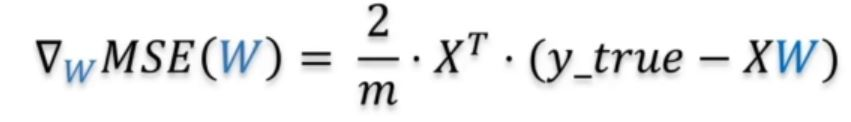

In [7]:
intercept = []
coef = []

for i in range(3000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - Y)
    weights = weights - eta * gradient
    intercept.append(weights[0][0])
    coef.append(weights[1][0])

print(weights)

[[2749.9560089 ]
 [ 250.01027542]]


In [13]:
df = pd.DataFrame(data={'intercept': intercept, 'coef': coef})
df.head()

intercept        coef
0   72.996458  268.202239
1  125.262372  450.071141
2  163.752145  573.114529
3  192.859085  656.140472
4  215.572070  711.944393

### <a name='5'></a> Wizualizacja dopasowania

In [15]:
px.line(df, y='intercept', title='Dopasowanie: intercept', width=800)

In [16]:
px.line(df, y='coef', title='Dopasowanie: coef', width=800)